<div style="background-image: url('bg29.png');width:990;height:145px;display:table;">
    <table style="margin:0px;width:100%;height:100%">
        <tr style="background-color:rgba(0, 0, 0, 0);"><td>
                 <img src="bubblebox_logo4.png" alt="Forest" style="width:90%;" align="right">
            </td>
            <td></td>
            <td>
            <td></td>
            <td>
                <img src="https://www.mn.uio.no/hylleraas/english/about/internal/graphical-profile/visual-profile/hylleraas-%E2%80%93-logo-%E2%80%93-screen-%E2%80%93-rgb.png" alt="Forest" style="width:80%;" align="right">
                </td>
                <td>
                <img src="https://upload.wikimedia.org/wikipedia/commons/f/f4/UiO_logo.png" style="width:30%">
            </td>
        </tr>
    </table>
</div>

### BubbleBox
# 5 minute flash tutorial

---

####  Audun Skau Hansen ( a.s.hansen@kjemi.uio.no ) at The Hylleraas Centre for Quantum Molecular Sciences, Universitetet i Oslo (2021)



This tutorial gives a brief introduction to setting up and running simulations with BubbleBox in the Jupyter Notebook environment. Feel free to skip forward to the relevant information, just remember to import the required modules.

<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home" style = "background-color:rgba(30, 00, 10, .7);border-color:rgba(0, 0, 0, 1)">Content</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#Imports" role="tab" aria-controls="profile">Imports<span class="badge badge-primary badge-pill">1</span></a>
<a class="list-group-item list-group-item-action"  data-toggle="list" href="#Walled boundary conditions" role="tab" aria-controls="settings">Walled boundary conditions<span class="badge badge-primary badge-pill">2</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#Variables" role="tab" aria-controls="messages">Variables<span class="badge badge-primary badge-pill">3</span></a>
<a class="list-group-item list-group-item-action"  data-toggle="list" href="#Time propagation" role="tab" aria-controls="settings">Time propagation<span class="badge badge-primary badge-pill">4</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#Periodic boundary conditions" role="tab" aria-controls="settings">Periodic boundary conditions<span class="badge badge-primary badge-pill">5</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#Mixed boundary conditions" role="tab" aria-controls="settings">Mixed boundary conditions<span class="badge badge-primary badge-pill">6</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#Masses" role="tab" aria-controls="settings">Masses<span class="badge badge-primary badge-pill">7</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#Fixed positions" role="tab" aria-controls="settings">Fixed positions<span class="badge badge-primary badge-pill">8</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#Interactions" role="tab" aria-controls="settings">Interactions<span class="badge badge-primary badge-pill">9</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#State variables" role="tab" aria-controls="settings">State variables<span class="badge badge-primary badge-pill">9</span></a>
</div>

# Imports

In [1]:
# Enable animations and interactive visuals in Jupyter Notebook
%matplotlib notebook 

# Import bubblebox module
import bubblebox as bb

# Some other useful stuff (both also implicitly imported in bubblebox)
import matplotlib.pyplot as plt
import numpy as np

<h1>
<span id="Walled boundary conditions"> &nbsp; </span>
Walled boundary conditions
</h1>

<IPython.core.display.Javascript object>


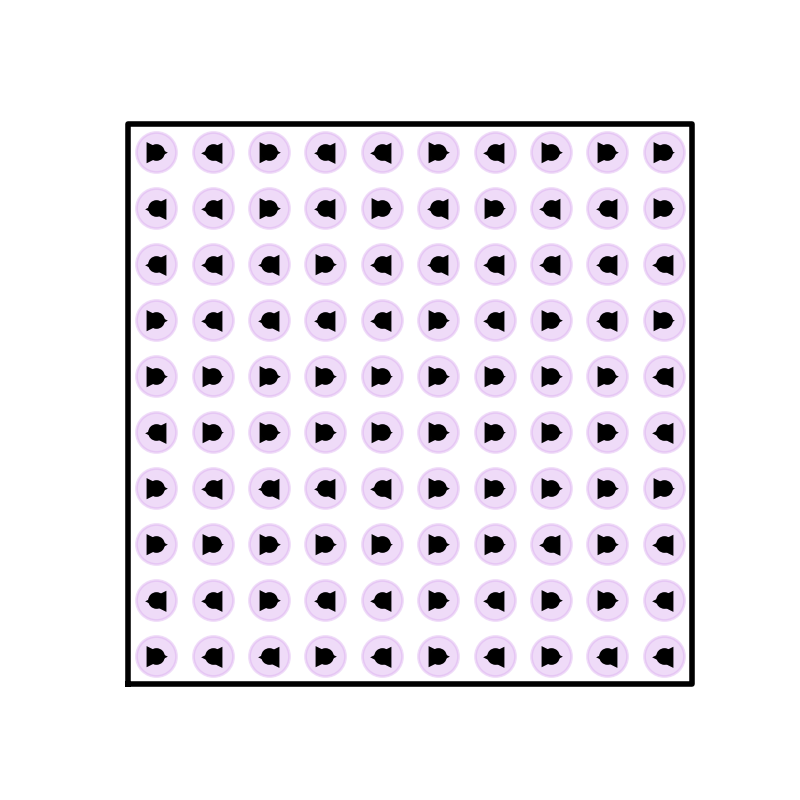

In [2]:
# Set up a monatomic, walled system

# A 20 x 20 walled box
box_dims = (10,10)

# Number of bubbles in box
# (Will be uniformly distributed inside box)
number_of_bubbles = 100


# Set up box
system = bb.box(n_bubbles = number_of_bubbles, box = box_dims, relax = False) 

# Visualize box at current state
system.visualize_state()

<h1>
<span id="Variables"> &nbsp; </span>
Variables
</h1>

In [3]:
print("Some variables and settings, change interactively at any point in simulation:")
print("Timestep               :", system.dt)
print("Shape of position array:", system.pos.shape) # 2D vectors
print("Position of bubble  #0 :", system.pos[:,0]) 
print("Velocity of bubble  #0 :", system.vel[:,0])
print("Halfstep vel,bubble #0 :", system.vel_[:,0]) # <- this one is used in the time integration
print("Interaction parameters :", system.interactions.shape) # <- LJ epsilon and sigma for each pair of particles
print("Active/incative bubbles:", system.active.shape) #<- if False, particle will not update position
print("Mass of bubbles        :", system.masses.shape) # Array containing masses

Some variables and settings, change interactively at any point in simulation:
Timestep               : 0.001
Shape of position array: (2, 100)
Position of bubble  #0 : [-9. -9.]
Velocity of bubble  #0 : [ 0. -0.]
Halfstep vel,bubble #0 : [ 0. -0.]
Interaction parameters : (100, 100, 2)
Active/incative bubbles: (100,)
Mass of bubbles        : (100,)


<h1>
<span id="Time propagation"></span>
Time propagation
</h1>
<p></p>
In order to stop the simulation, press the button in the upper right of the simulation window.

Initial time   : 0
Time after 1 dt: 0.001
Time after 1 s : 1.0010000000000006


<IPython.core.display.Javascript object>


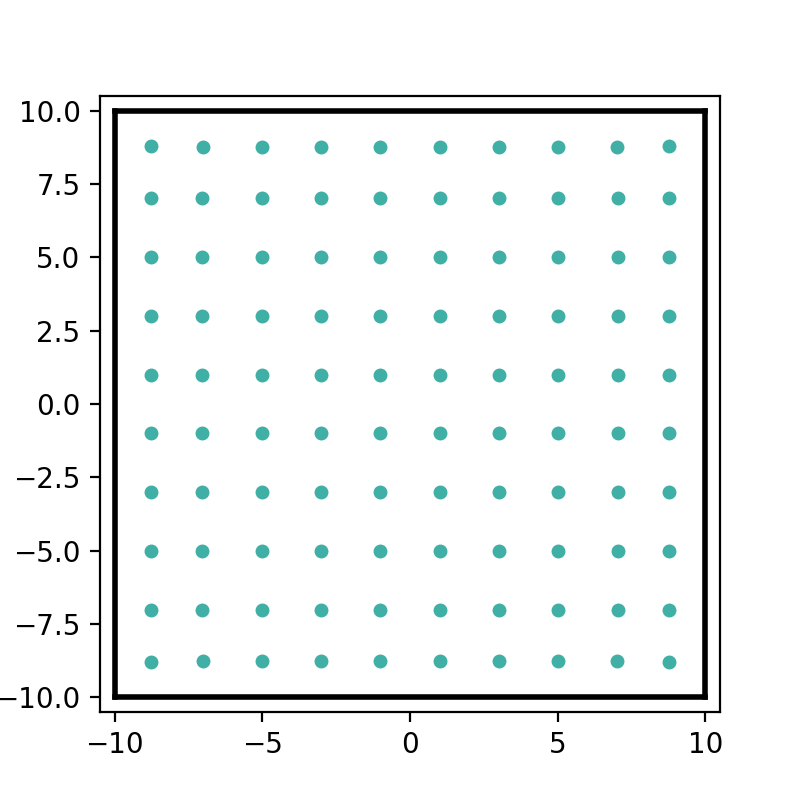

In [4]:
## Time propagation methods

print("Initial time   :", system.t)

# Advance one single timestep
system.advance()

print("Time after 1 dt:", system.t)

# Advance for 1 second
system.evolve(1)

print("Time after 1 s :", system.t)

# Run system infinitely, visualize on the fly
system.run()

<h1>
<span id="Periodic boundary conditions"> &nbsp; </span>
Periodic boundary conditions
</h1>

<IPython.core.display.Javascript object>


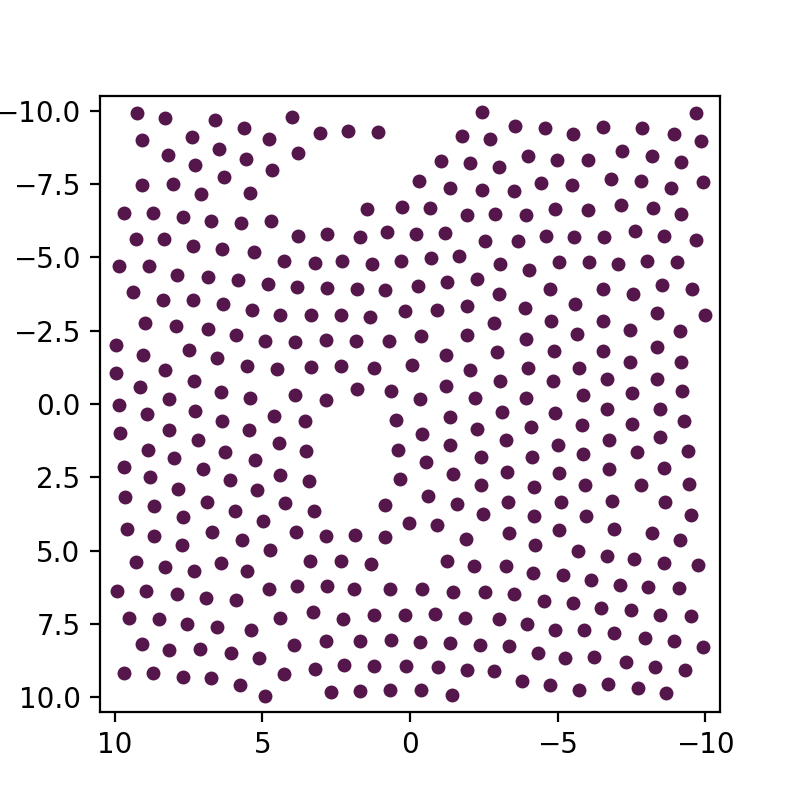

In [5]:
# A fully periodic "torus"-like boundary, closely packed bubbles

# A 20 x 20 periodic lattice-cell, notice the minus sign, implying periodic axis
box_dims = (-10,-10) 


# Set up box
system = bb.box(n_bubbles = 400, box = box_dims, relax = False) 

# Change timestep
system.dt = 0.005

# Not much interesting will happen unless you add some tiny perturbation
system.vel_ = np.random.uniform(-.1, .1, system.vel_.shape)

# Run system
system.run(n_steps_per_vis=5) # Do 10 iterations between every visual update

<h1>
<span id="Mixed boundary conditions"> &nbsp; </span>
Mixed boundary conditions
</h1>

<IPython.core.display.Javascript object>


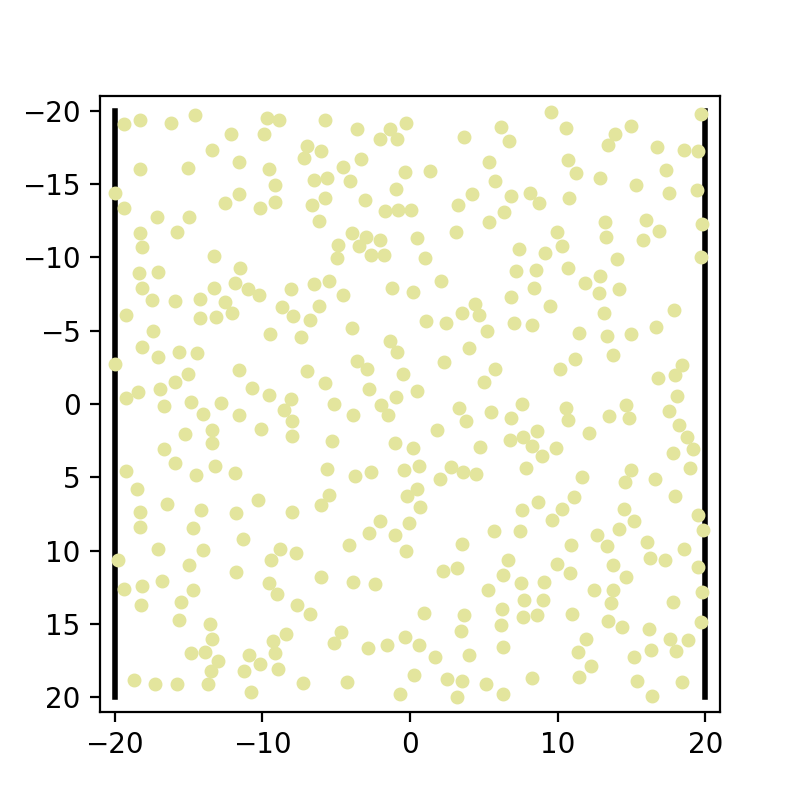

In [6]:
# Set up and run a monatomic system, walled along X and periodic along Y

# A 20 x 20 "pipe" in y-direction with 400 bubbles. Notice the minus sign, implying periodic axis
system = bb.box(n_bubbles = 400, box = (20,-20), relax = False) 

# Give bubbles some velocity in periodic direction
system.vel_[1,:] = np.random.uniform(2,10, system.n_bubbles)

# Some more randomness for "realism"
system.vel_[0,:] = np.random.uniform(-.3,.3, system.n_bubbles)

# Run system
system.run(n_steps_per_vis=10) # Do 10 iterations between every visual update

<h1>
<span id="Masses"> &nbsp; </span>
Masses
</h1>

<IPython.core.display.Javascript object>


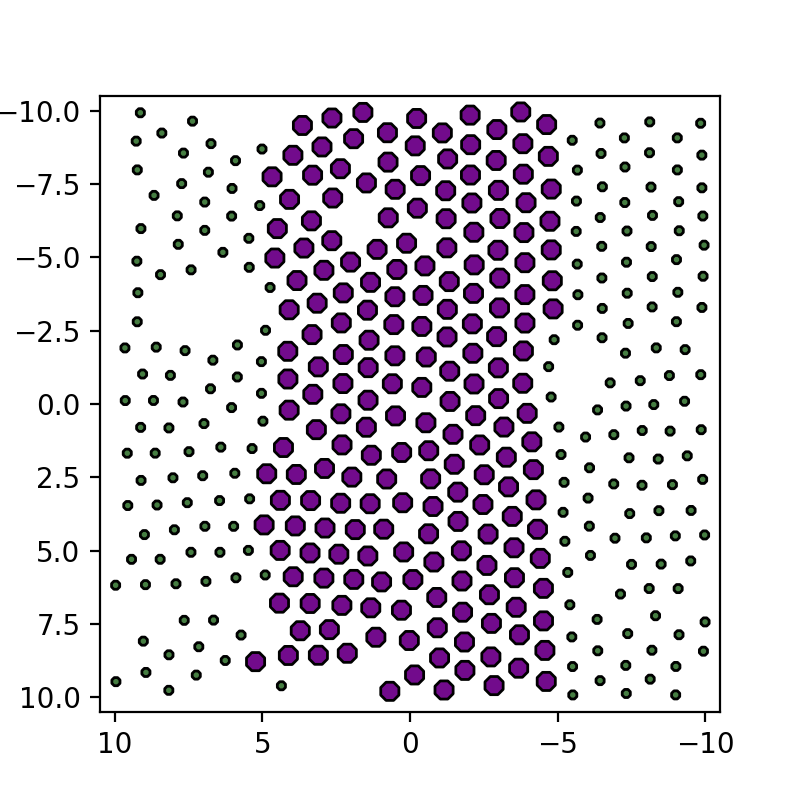

In [7]:
# Set up and run a diatomic system

# A 20 x 20 periodic lattice-cell, notice the minus sign, implying periodic axis
box_dims = (-10,-10) 

# Number of bubbles in box
# (Will be uniformly distributed inside box)
number_of_bubbles = 400


# Set up box
system = bb.box(n_bubbles = number_of_bubbles, box = box_dims, relax = False) 

# Change mass of half the particles
system.masses[int(number_of_bubbles/4):int(3*number_of_bubbles/4):] = 5

# Change timestep
system.dt = 0.005

# Not much interesting will happen unless you add some tiny perturbation
system.vel_ = np.random.uniform(-.1, .1, system.vel_.shape)

# Run system
system.run(n_steps_per_vis=5) # Do 10 iterations between every visual update

<h1>
<span id="Fixed positions"> &nbsp; </span>
Fixed positions
</h1>

<IPython.core.display.Javascript object>


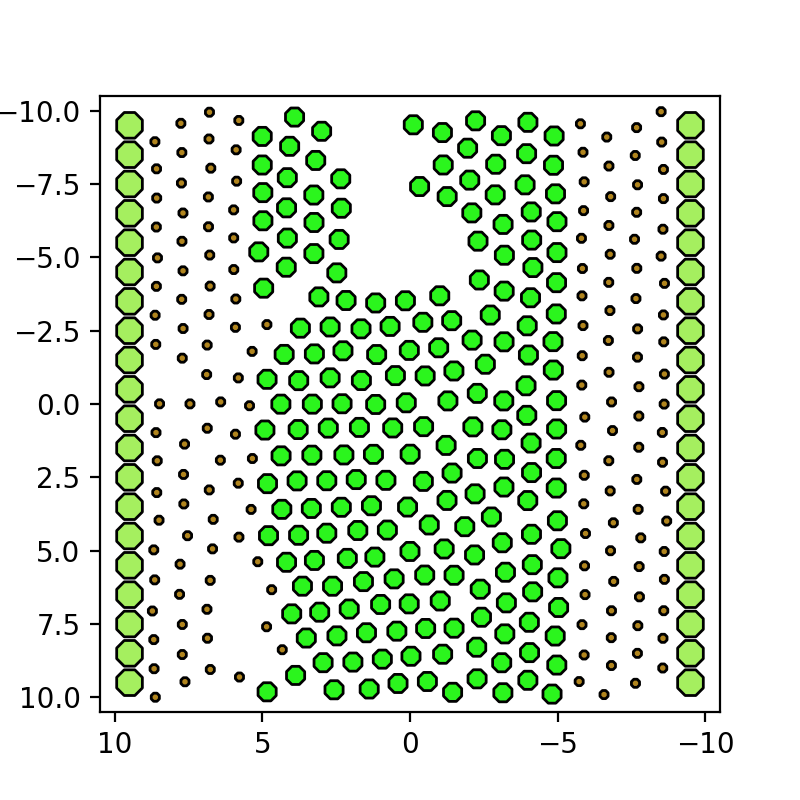

In [8]:
# Set up and run a diatomic system with fixed atoms at boundaries / irregular boundary conditions

# A 20 x 20 periodic lattice-cell, notice the minus sign, implying periodic axis
box_dims = (-10,-10) 

# Number of bubbles in box
# (Will be uniformly distributed inside box)
number_of_bubbles = 400


# Set up box
system = bb.box(n_bubbles = number_of_bubbles, box = box_dims, relax = False) 

# Change mass of half the bubbles
system.masses[int(number_of_bubbles/4):int(3*number_of_bubbles/4):] = 5

# Assign more mass to the boundary, lock them in position
system.masses[:20] = 10
system.masses[-20:] = 10

system.active[:20] = False
system.active[-20:] = False


# Change timestep
system.dt = 0.005

# Not much interesting will happen unless you add some tiny perturbation
system.vel_ = np.random.uniform(-.1, .1, system.vel_.shape)

# Run system
system.run(n_steps_per_vis=10) # Do 10 iterations between every visual update

<h1>
<span id="Interactions"> &nbsp; </span>
Interactions
</h1>

<IPython.core.display.Javascript object>


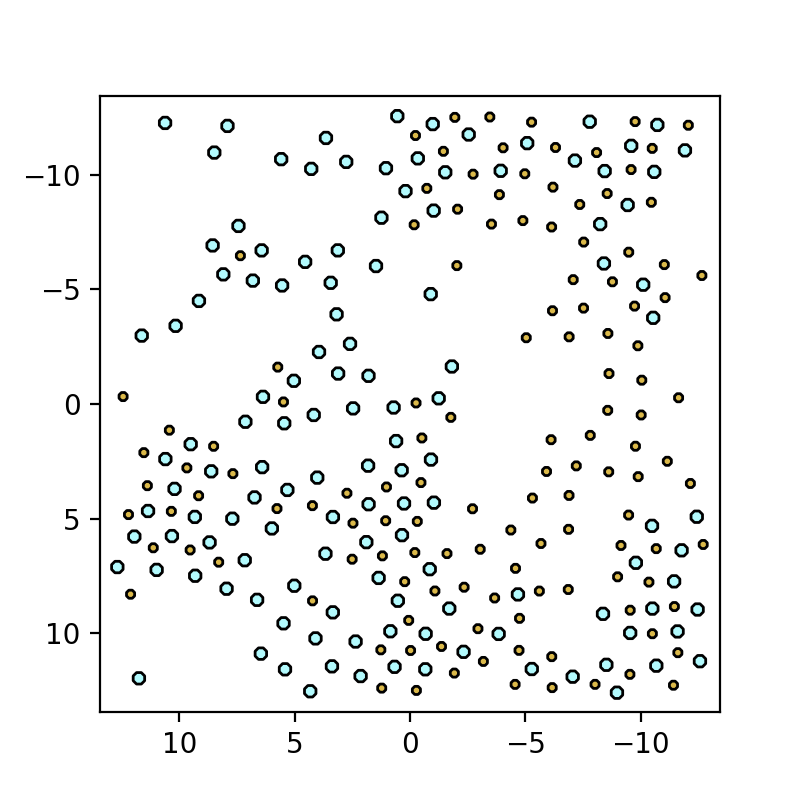

In [18]:
# Change interaction parameters for groups of bubbles

N = 4**2 #number of bubbles


b = bb.box(n_bubbles = N**2, box = (-.8*N, -.8*N), vel = 1, relax = False) #vel = 1 assigns random velocities (-1,1)
b.dt = 0.005 #timestep

b.masses[int(N**2/2):] = 2 # two component system ("A" and "B")


# Bonding distances is by default 1
b.interactions[:int(N**2/2), :int(N**2/2), 1] = np.sqrt(2) # A-A bonding distance (LJ sigma)
b.interactions[int(N**2/2):, int(N**2/2):, 1] = np.sqrt(2) # B-B bonding distance

b.interactions[:int(N**2/2), :int(N**2/2), 0] = 2
b.interactions[int(N**2/2):, int(N**2/2):, 0] = 2

b.interactions[int(N**2/2):, :int(N**2/2), 0] = 2
b.interactions[:int(N**2/2), int(N**2/2):, 0] = 2
b.run(n_steps_per_vis=15)

<h1>
<span id="State variables"> &nbsp; </span>
State variables
</h1>

<IPython.core.display.Javascript object>


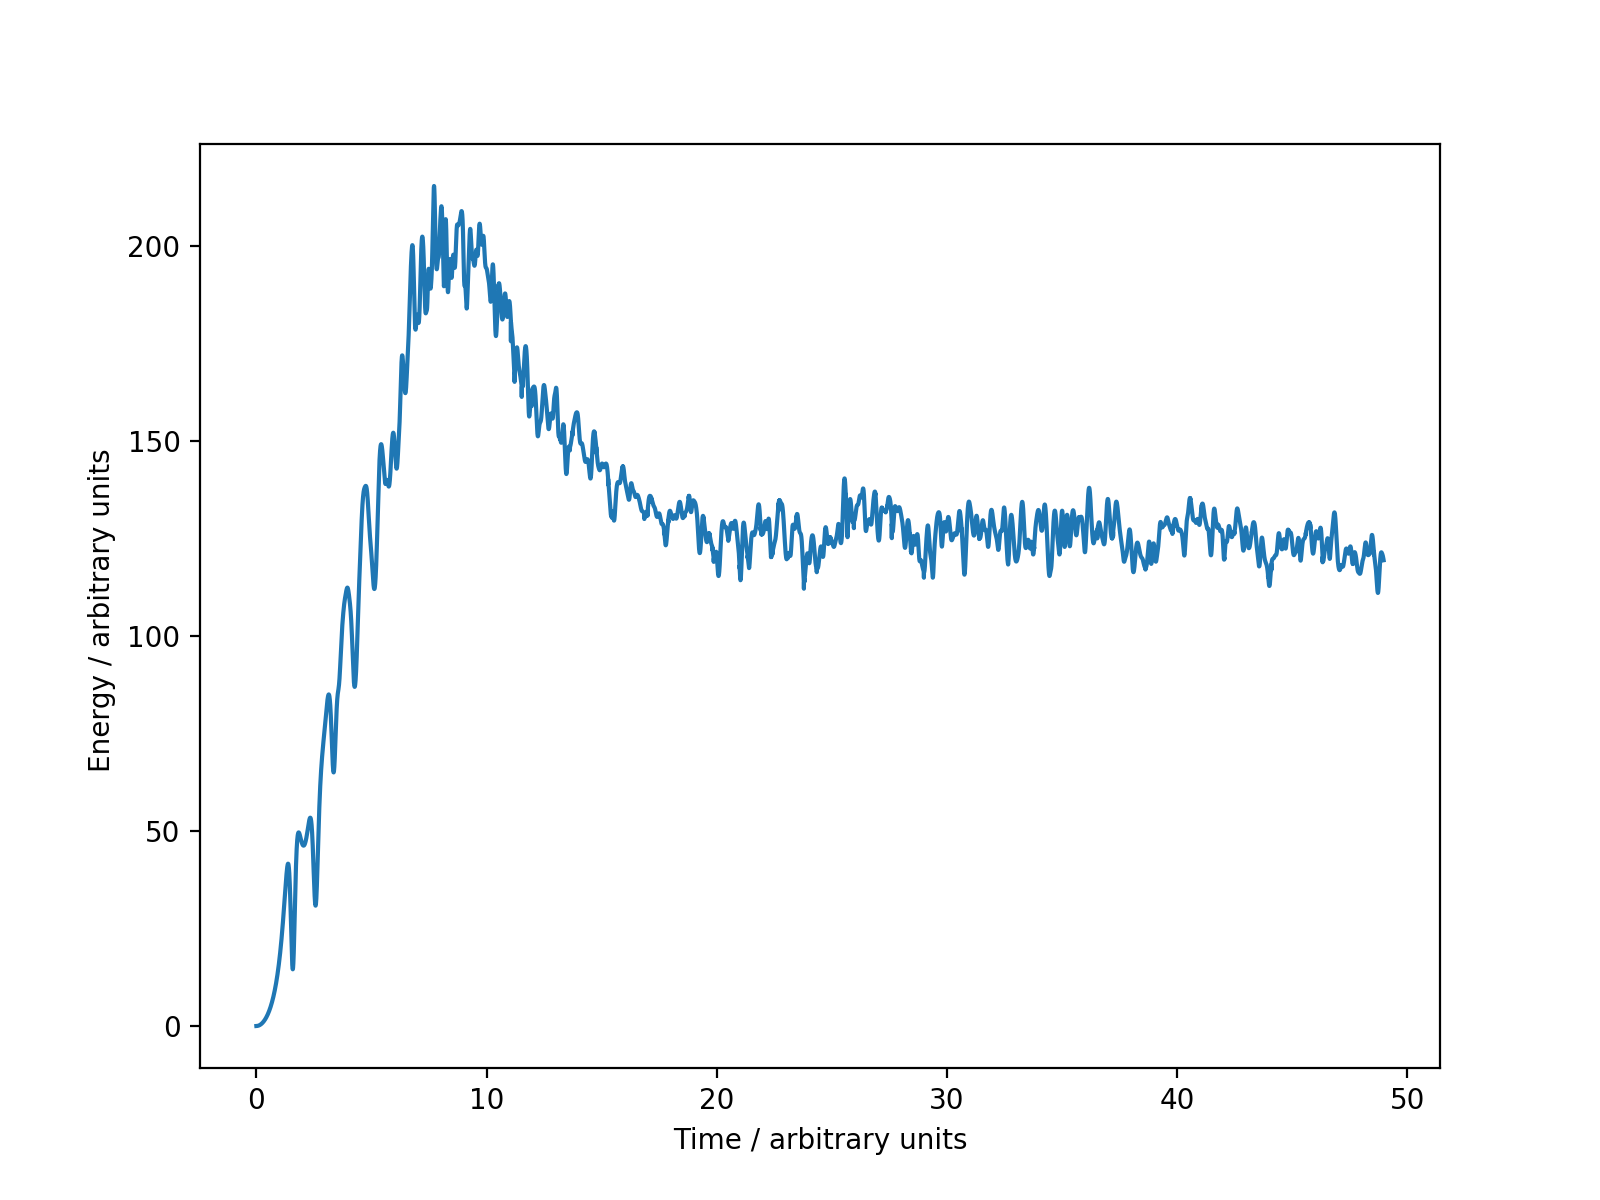

End temperature: 0.60
Number of collisions with boundary per time: 5.60


In [19]:
# Kinetic energy and temperature

# Set up box
system = bb.box(n_bubbles = 200, box = (10,10), relax = False) 



# Compute kinetic energies for nt timesteps
nt = 20000

kinetic_energies = np.zeros(nt, dtype = float)
collisions = np.zeros(nt, dtype = float)
for i in range(nt):
    system.advance()
    kinetic_energies[i] = system.kinetic_energy()
    collisions[i] = system.col

plt.figure(2, figsize=  (8,6))
plt.plot(np.linspace(0,b.t, nt), kinetic_energies)
plt.xlabel("Time / arbitrary units")
plt.ylabel("Energy / arbitrary units ")
plt.show()

print("End temperature: %.2f" % np.mean(system.kinetic_energies()))
print("Number of collisions with boundary per time: %.2f" %  (np.sum(collisions)/system.t))
